### Importing dependencies

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Reading and plotting images

In [22]:
def drawImg(img,title='Image: '):
    plt.imshow(img,cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.title(title+str(img.shape))
    plt.show()


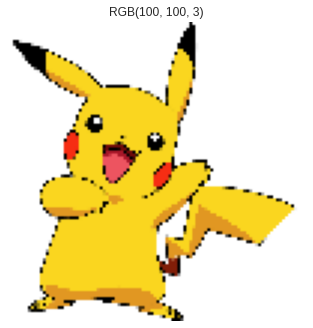

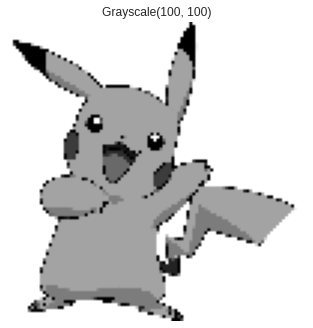

In [23]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/297.jpg') # opencv reads images by deafault in BGR format
# Converting BGR image into a RGB image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Resizing the image
img = cv2.resize(img,(100,100))
# Converting RGB image into a Grayscale image
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
drawImg(img,"RGB")
drawImg(img_gray,'Grayscale')

### Building Convolutional operation from scratch

In [24]:
# Convolution using Hardcoded filters
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]

    F = img_filter.shape[0] #3
    new_img = np.zeros((W-F+1,H-F+1))

    # Outer two loops are for iterating over new output

    for row in range(W-F+1):
        for col in range(H-F+1):
            # Inner two loops are for iterating over filter
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]

                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
    
    return new_img # Activation Map 


### Defining a Blur filter and an Edge filter

In [25]:
blur_filter = np.ones((3,3))/9.0
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])

### Extracting features of an image using filters

In [26]:
output_1 = convolution(img_gray,blur_filter)
output_2 = convolution(img_gray,edge_filter)

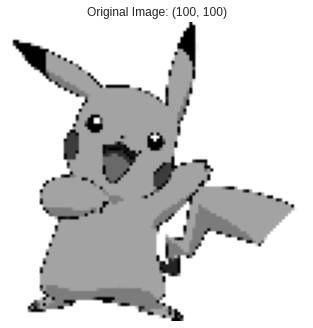

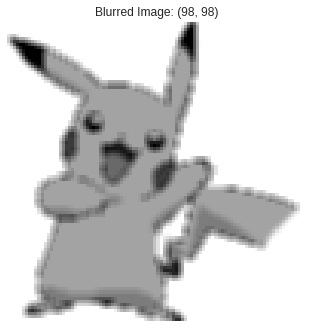

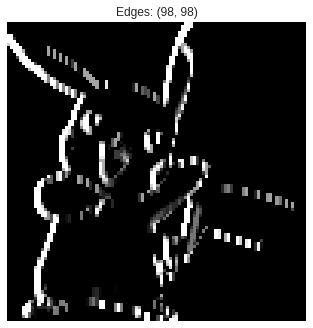

In [27]:
drawImg(img_gray,"Original Image: ")
drawImg(output_1,"Blurred Image: ")
drawImg(output_2,"Edges: ")

### Adding padding to an Image

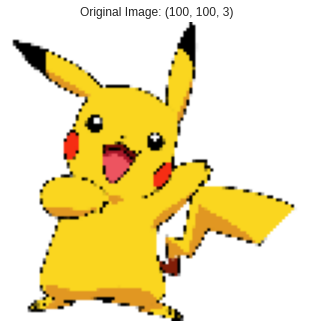

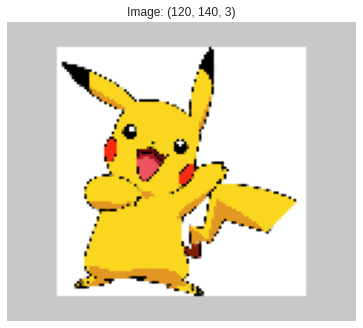

In [28]:
drawImg(img,'Original Image: ')

# Adding Padding to the original image
padded_img = np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values = 200)
drawImg(padded_img)

So, we can notice image gets padded and size of image also gets changed. Constant value = 200, makes the padding to be filled with gray colour.

### Implementing Pooling Operation

In [36]:
X = np.array([[1,0,2,3],
             [4,6,6,8],
             [3,1,1,0],
             [1,2,2,4]])

def pooling(X,mode='max'):
    stride=2
    f = 2
    H,W = X.shape

    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1

    output = np.zeros((HO,WO))

    for r in range(HO):
        for c in range(WO):
            r_start = r * stride
            r_end = r_start + f
            c_start = c * stride
            c_end = c_start + f

            X_slice = X[r_start:r_end,c_start:c_end]
            if mode == 'max':
                output[r][c] = np.max(X_slice)
            elif mode == 'average':
                output[r][c] = np.mean(X_slice)

    return output

In [38]:
pooling_output = pooling(X,'max')
print(pooling_output)

[[6. 8.]
 [3. 4.]]


In [39]:
pooling_output = pooling(X,'average')
print(pooling_output)

[[2.75 4.75]
 [1.75 1.75]]
